LogisticRegression ROC AUC mean: 0.77
LogisticRegression ROC AUC std: 0.03
DecisionTreeClassifier ROC AUC mean: 0.69
DecisionTreeClassifier ROC AUC std: 0.06
RandomForestClassifier ROC AUC mean: 0.78
RandomForestClassifier ROC AUC std: 0.04
LinearSVC ROC AUC mean: 0.77
LinearSVC ROC AUC std: 0.03


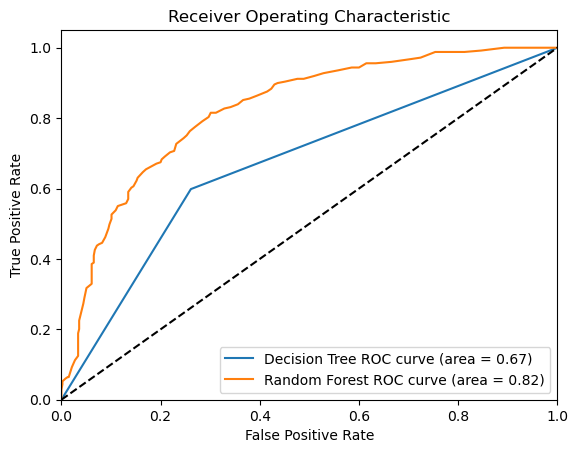

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

file_path = "/Users/pepijnschouten/Desktop/Python_Scripts" \
                "/Python_Scripts_Books/Distributed_ML_with_PySpark" \
                    "/Python_Own_Files/Chapter 2/data/diabetes.csv"

"""
Data Preprocessing
"""
pandas_df = pd.read_csv(file_path)

pandas_df = pandas_df.loc[(pandas_df["Glucose"] != 0)
                          & (pandas_df["BloodPressure"] != 0)
                          & (pandas_df["BMI"] != 0),
                          ["Pregnancies", "Glucose", "BloodPressure",
                           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]

pandas_df.head(5)  

"""
Scikit-Learn Model Selection with Cross Validation
"""
# split features and target
x_cols = [column for column in pandas_df.columns
          if column != "Outcome"]
X = pandas_df[x_cols]
y = pandas_df["Outcome"]

# standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# list of classifiers
classifiers = [LogisticRegression(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              LinearSVC()]

# cross validation
for classifier in classifiers:
    results = cross_val_score(classifier,
                              x_scaled,
                              y,
                              cv=10)
    print(f"{classifier.__class__.__name__} ROC AUC mean: {results.mean():.2f}")
    print(f"{classifier.__class__.__name__} ROC AUC std: {results.std():.2f}",
          sep="\n")

"""
Generating ROC curves
"""

# models
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# cross validation
y_scores_decision_tree = cross_val_predict(
    decision_tree_model,
    x_scaled,
    y,
    cv=10,
    method="predict_proba"
)
y_scores_random_forest = cross_val_predict(
    random_forest_model,
    x_scaled,
    y,
    cv=10,
    method="predict_proba"
)

# ROC curves
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y, y_scores_decision_tree[:, 1])
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y, y_scores_random_forest[:, 1])
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

# plot the curves
plt.figure()
plt.plot(fpr_decision_tree, tpr_decision_tree,
         label=f"Decision Tree ROC curve (area = {roc_auc_decision_tree:.2f})")
plt.plot(fpr_random_forest, tpr_random_forest,
         label=f"Random Forest ROC curve (area = {roc_auc_random_forest:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")    
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

